In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
df=pd.read_csv('income.csv')
df

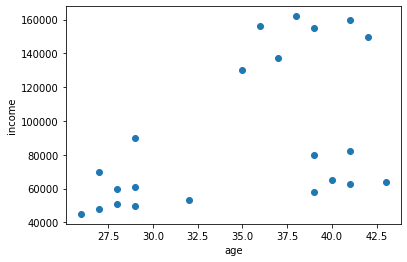

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['age'],df['income'])
plt.xlabel('age')
plt.ylabel('income')
plt.show()

In [ ]:
model=KMeans(n_clusters=3)
y_pred=model.fit_predict(df[['age','income']])
print(y_pred)


[0 0 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 0 0 2]


In [ ]:
df['cluster']=y_pred
df

In [ ]:
print(model.cluster_centers_)

[[3.40000000e+01 8.05000000e+04]
 [3.82857143e+01 1.50000000e+05]
 [3.29090909e+01 5.61363636e+04]]


In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

No handles with labels found to put in legend.


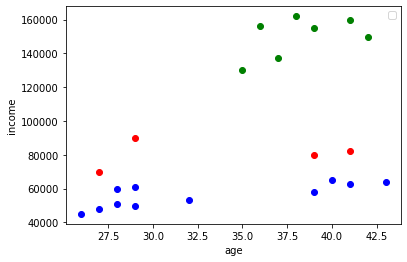

In [ ]:
plt.scatter(df1['age'],df1['income'],color='red')
plt.scatter(df2['age'],df2['income'],color='green')
plt.scatter(df3['age'],df3['income'],color='blue')
plt.xlabel('age')
plt.ylabel('income')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
dfnew=df
scaler=MinMaxScaler()
scaler.fit(dfnew[['income']])
dfnew['income']=scaler.transform(dfnew[['income']])

scaler.fit(dfnew[['age']])
dfnew['age']=scaler.transform(dfnew[['age']])
dfnew

In [ ]:
model1=KMeans(n_clusters=3)
y_pred1=model1.fit_predict(dfnew[['age','income']])
print(y_pred1)


[0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 2 2 2 2 2 2]


In [ ]:
dfnew['cluster']=y_pred1
print(model1.cluster_centers_)

[[0.1372549  0.11633428]
 [0.72268908 0.8974359 ]
 [0.85294118 0.2022792 ]]


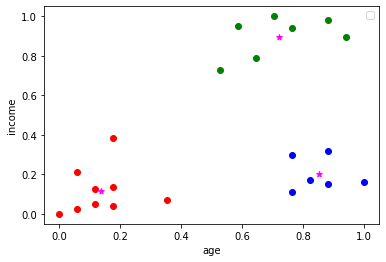

In [ ]:
df11=dfnew[dfnew['cluster']==0]
df22=dfnew[dfnew['cluster']==1]
df33=dfnew[dfnew['cluster']==2]

plt.scatter(df11['age'],df11['income'],color='red')
plt.scatter(df22['age'],df22['income'],color='green')
plt.scatter(df33['age'],df33['income'],color='blue')
plt.scatter(model1.cluster_centers_[:,0],model1.cluster_centers_[:,1],marker='*',color='magenta')
plt.xlabel('age')
plt.ylabel('income')
plt.legend()
plt.show()

# ELBOW **METHOD**

In [ ]:
sse=[]
for i in range(1,11):
  model2=KMeans(n_clusters=i)
  model2.fit(df[['age','income']])
  sse.append(model2.inertia_)

In [ ]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2621792762345213,
 0.21066678488010523,
 0.18444549281986072,
 0.13781880133764024,
 0.10740235405674733,
 0.08510915216361345]

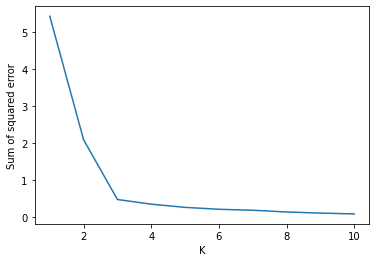

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,11),sse)
plt.show()